## Data Import

In [2]:
# ----------------------------------------------------------
# 📦 Import necessary libraries for data manipulation
# ----------------------------------------------------------

import pandas as pd  # For working with dataframes and structured data
import numpy as np   # For numerical computations and handling arrays

# ----------------------------------------------------------
# ⚠️ Suppress warnings for cleaner output (not recommended for debugging)
# ----------------------------------------------------------
from warnings import filterwarnings
filterwarnings('ignore')  # Ignores all warnings (use with caution during development)

In [3]:
# Importing the required csv files
matches = pd.read_csv(r'C:\Users\shail\OneDrive\Shailesh\Personal\Personal Learning\Sports Analyst Projects\IPL Win Probability Predictor\matches.csv')
deliveries = pd.read_csv(r'C:\Users\shail\OneDrive\Shailesh\Personal\Personal Learning\Sports Analyst Projects\IPL Win Probability Predictor\deliveries.csv')

In [4]:
# ----------------------------------------------------------
# 🔍 Display the first 5 rows of the 'matches' DataFrame 
# ----------------------------------------------------------
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
# ----------------------------------------------------------
# 🔍 Display the first 5 rows of the 'deliveries' DataFrame 
# ----------------------------------------------------------
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## Data Pre-Processing

In [6]:
# ----------------------------------------------------------
# 🧮 Create a DataFrame with total runs and target scores
# ----------------------------------------------------------

# Group the deliveries data by 'match_id' and 'inning' and compute the total runs for each group
# Reset the index to convert group labels into columns
total_score_df = (
    deliveries.groupby(['match_id', 'inning'], as_index=False)['total_runs']
    .sum()
    .rename(columns={'total_runs': 'total_runs'})  # Explicitly naming for clarity
)

# Calculate target score as total_runs + 1 (typical in limited-overs cricket)
total_score_df['target_score'] = total_score_df['total_runs'] + 1

# Display the resulting DataFrame
total_score_df

,match_id,inning,total_runs,target_score
0,1,1,207,208
1,1,2,172,173
2,2,1,184,185
3,2,2,187,188
4,3,1,183,184
...,...,...,...,...
1523,11413,2,170,171
1524,11414,1,155,156
1525,11414,2,162,163
1526,11415,1,152,153


In [7]:
# ----------------------------------------------------------
# 🎯 Filter to keep only 1st innings data (used for setting target)
# ----------------------------------------------------------

# Retain only the first innings from each match, since the target score is based on it
total_score_df = total_score_df[total_score_df['inning'] == 1]

# Display the filtered DataFrame (only first innings totals with target scores)
total_score_df

,match_id,inning,total_runs,target_score
0,1,1,207,208
2,2,1,184,185
4,3,1,183,184
6,4,1,163,164
8,5,1,157,158
...,...,...,...,...
1518,11347,1,143,144
1520,11412,1,136,137
1522,11413,1,171,172
1524,11414,1,155,156


In [8]:
# ----------------------------------------------------------
# 🔗 Merge match data with calculated target scores
# ----------------------------------------------------------

# Merge 'matches' DataFrame with 'total_score_df' to bring in the target score
# 'matches.id' corresponds to 'total_score_df.match_id'
matches_df = matches.merge(
    total_score_df[['match_id', 'target_score']],  # Select only necessary columns for merging
    left_on='id',
    right_on='match_id',
    how='inner'  # Default is 'inner'; explicitly mentioned for clarity
)

# Display the first few rows of the merged DataFrame
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,target_score
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,185
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,184
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,164
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158


In [9]:
# ----------------------------------------------------------
# 📋 Display all unique team names listed as 'team1' in the matches dataset
# ----------------------------------------------------------

matches_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [10]:
# ----------------------------------------------------------
# 🧹 Clean and filter match data for current IPL teams only
# ----------------------------------------------------------

# Define the list of IPL teams currently active
teams = [
    'Chennai Super Kings', 'Delhi Capitals', 'Kings XI Punjab',
    'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals',
    'Royal Challengers Bangalore', 'Sunrisers Hyderabad'
]

# 🔁 Standardize historical team names to current equivalents

# Replace 'Delhi Daredevils' with the updated name 'Delhi Capitals'
matches_df['team1'] = matches_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals', regex=False)
matches_df['team2'] = matches_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals', regex=False)

# Replace 'Deccan Chargers' with 'Sunrisers Hyderabad' (same franchise, renamed)
matches_df['team1'] = matches_df['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad', regex=False)
matches_df['team2'] = matches_df['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad', regex=False)

# ✅ Filter the DataFrame to include only rows where both teams are current IPL teams
matches_df = matches_df[
    matches_df['team1'].isin(teams) & matches_df['team2'].isin(teams)
]

In [11]:
matches_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [12]:
matches_df.shape

(641, 20)

In [13]:
# ----------------------------------------------------------
# 🌦️ Remove rain-affected matches (DLS method applied)
# ----------------------------------------------------------

# The 'dl_applied' column indicates if the Duckworth-Lewis method was used due to rain
# We keep only those matches where DLS was NOT applied (dl_applied == 0)
matches_df = matches_df[matches_df['dl_applied'] == 0]

# Display the filtered DataFrame (only matches without weather interruptions)
matches_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,target_score
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,179
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,149
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,144
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,137
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,172
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,156


In [14]:
# ----------------------------------------------------------
# 📌 Select only relevant columns from 'matches_df' 
# (to prepare for merging with 'deliveries' data)
# ----------------------------------------------------------

# Keep only the necessary columns:
# - 'match_id': to join with deliveries
# - 'city': for location-based analysis
# - 'winner': for identifying match outcome
# - 'target_score': computed earlier for 1st innings
matches_df = matches_df[['match_id', 'city', 'winner', 'target_score']]

# Display the cleaned DataFrame with essential match-level information
matches_df

,match_id,city,winner,target_score
0,1,Hyderabad,Sunrisers Hyderabad,208
4,5,Bangalore,Royal Challengers Bangalore,158
6,7,Mumbai,Mumbai Indians,179
7,8,Indore,Kings XI Punjab,149
9,10,Mumbai,Mumbai Indians,159
...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,144
752,11412,Chennai,Mumbai Indians,137
753,11413,Visakhapatnam,Delhi Capitals,172
754,11414,Visakhapatnam,Chennai Super Kings,156


In [15]:
# ----------------------------------------------------------
# 🔗 Merge ball-by-ball delivery data with match-level info
# ----------------------------------------------------------

# Merge the filtered 'matches_df' (containing match-level info like city, winner, and target_score)
# with the 'deliveries' DataFrame (ball-by-ball data), using 'match_id' as the key
deliveries_df = matches_df.merge(deliveries, on='match_id', how='inner')

# Display the resulting DataFrame with combined match and delivery-level details
deliveries_df

,match_id,city,winner,target_score,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [16]:
# ----------------------------------------------------------
# 🧮 Filter to retain only second innings data
# ----------------------------------------------------------

# Since we want to calculate win probability based on the second innings chase,
# we keep only rows where 'inning' equals 2
deliveries_df = deliveries_df[deliveries_df['inning'] == 2]

# Display the filtered delivery-level data (only for second innings)
deliveries_df

,match_id,city,winner,target_score,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [17]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72413 entries, 125 to 149577
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          72413 non-null  int64 
 1   city              71581 non-null  object
 2   winner            72386 non-null  object
 3   target_score      72413 non-null  int64 
 4   inning            72413 non-null  int64 
 5   batting_team      72413 non-null  object
 6   bowling_team      72413 non-null  object
 7   over              72413 non-null  int64 
 8   ball              72413 non-null  int64 
 9   batsman           72413 non-null  object
 10  non_striker       72413 non-null  object
 11  bowler            72413 non-null  object
 12  is_super_over     72413 non-null  int64 
 13  wide_runs         72413 non-null  int64 
 14  bye_runs          72413 non-null  int64 
 15  legbye_runs       72413 non-null  int64 
 16  noball_runs       72413 non-null  int64 
 17  penalty_runs  

In [18]:
# ----------------------------------------------------------
# 🏏 Calculate the current score at each ball of the second innings
# ----------------------------------------------------------

# Create a new column 'current_score' that contains the running total of runs scored in each match
# This is calculated using cumulative sum (cumsum) grouped by 'match_id'
deliveries_df['current_score'] = deliveries_df.groupby('match_id')['total_runs'].cumsum()

# Display the first 15 rows to verify the new column
deliveries_df.head(15)

,match_id,city,winner,target_score,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7
130,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,6,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,11
131,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,...,0,0,0,0,0,0,NaN,NaN,NaN,11
132,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,CH Gayle,...,0,0,0,0,0,0,NaN,NaN,NaN,11
133,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,12
134,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,4,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,12


In [19]:
# ----------------------------------------------------------
# 🏃 Calculate Runs Left to Win
# ----------------------------------------------------------

# runs_left = target_score - current_score
# This tells us how many more runs are needed to reach the target at any point in the innings
deliveries_df['runs_left'] = deliveries_df['target_score'] - deliveries_df['current_score']

# Display the first 15 rows to verify the new column
deliveries_df.head(15)

,match_id,city,winner,target_score,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,207
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,205
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,201
130,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,6,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,11,197
131,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,...,0,0,0,0,0,NaN,NaN,NaN,11,197
132,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,CH Gayle,...,0,0,0,0,0,NaN,NaN,NaN,11,197
133,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,12,196
134,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,4,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,12,196


In [20]:
# ----------------------------------------------------------
# ⏳ Calculate the number of balls left in the second innings
# ----------------------------------------------------------

# Each T20 innings has 20 overs × 6 balls = 120 balls
# However, in the dataset, ball numbers go from 1 to 6, so total logical range is 1 to 6 per over
# So we compute: balls completed = over * 6 + ball
# Then, balls_left = 126 - (over * 6 + ball)
# (126 is used instead of 120 to align with ball numbering starting at 1 instead of 0)

deliveries_df['balls_left'] = 126 - (deliveries_df['over'] * 6 + deliveries_df['ball'])

# Display first 20 rows to verify the new 'balls_left' column
deliveries_df.head(20)

,match_id,city,winner,target_score,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,201,115
130,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,6,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,11,197,114
131,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,...,0,0,0,0,NaN,NaN,NaN,11,197,113
132,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,CH Gayle,...,0,0,0,0,NaN,NaN,NaN,11,197,112
133,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,12,196,111
134,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,4,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,12,196,110


In [21]:
# ----------------------------------------------------------
# 🧍‍♂️ Calculate the number of wickets left at each delivery
# ----------------------------------------------------------

# Step 1: Replace NaNs in 'player_dismissed' with '0' (no wicket)
deliveries_df['player_dismissed'] = deliveries_df['player_dismissed'].fillna('0')

# Step 2: Convert all non-zero values (i.e., any dismissal) to '1'
# This ensures each dismissal is counted as a single wicket
deliveries_df['player_dismissed'] = deliveries_df['player_dismissed'].apply(lambda x: '1' if x != '0' else '0')

# Step 3: Convert the string column to integer type for arithmetic
deliveries_df['player_dismissed'] = deliveries_df['player_dismissed'].astype(int)

# Step 4: Calculate cumulative number of wickets lost in each match
wickets = deliveries_df.groupby('match_id')['player_dismissed'].cumsum().values

# Step 5: Subtract cumulative wickets from 10 to get wickets remaining
deliveries_df['wickets_left'] = 10 - wickets

# Display the updated DataFrame with the new 'wickets_left' column
deliveries_df

,match_id,city,winner,target_score,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,1,4,5
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-1,3,5
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-2,2,4
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-4,1,4


In [22]:
# ----------------------------------------------------------
# 📈 Calculate Current Run Rate (CRR)
# ----------------------------------------------------------

# CRR = (current_score / overs_faced) 
# Since each over has 6 balls, overs_faced = (120 - balls_left) / 6
# Rearranged: CRR = (current_score * 6) / (120 - balls_left)
# We round it to 2 decimal places for better readability
deliveries_df['CRR'] = ((deliveries_df['current_score'] * 6) / (120 - deliveries_df['balls_left'])).round(2)

# Replace inf values caused by division by 0
deliveries_df['CRR'].replace([np.inf, -np.inf], 0, inplace=True)

# Display first 10 rows to verify CRR calculation
deliveries_df.head(10)

,match_id,city,winner,target_score,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,CRR
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,NaN,NaN,1,207,119,10,6.00
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,NaN,NaN,1,207,118,10,3.00
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,NaN,NaN,1,207,117,10,2.00
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,NaN,NaN,3,205,116,10,4.50
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,NaN,NaN,7,201,115,10,8.40
130,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,6,Mandeep Singh,...,0,4,0,NaN,NaN,11,197,114,10,11.00
131,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,...,0,0,0,NaN,NaN,11,197,113,10,9.43
132,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,CH Gayle,...,0,0,0,NaN,NaN,11,197,112,10,8.25
133,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,CH Gayle,...,0,1,0,NaN,NaN,12,196,111,10,8.00
134,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,4,Mandeep Singh,...,0,0,0,NaN,NaN,12,196,110,10,7.20


In [23]:
# ----------------------------------------------------------
# 📊 Calculate Required Run Rate (RRR)
# ----------------------------------------------------------

# RRR = (runs_left / overs_left)
# Since overs = balls_left / 6, the formula becomes:
# RRR = (runs_left * 6) / balls_left
# Rounded to 2 decimal places for clarity
deliveries_df['RRR'] = ((deliveries_df['runs_left'] * 6) / deliveries_df['balls_left']).round(2)

deliveries_df['RRR'] = deliveries_df['RRR'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Display first 10 rows to verify the RRR values
deliveries_df.head(10)

,match_id,city,winner,target_score,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,CRR,RRR
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,207,119,10,6.00,10.44
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,207,118,10,3.00,10.53
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,207,117,10,2.00,10.62
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,205,116,10,4.50,10.60
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,201,115,10,8.40,10.49
130,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,6,Mandeep Singh,...,4,0,NaN,NaN,11,197,114,10,11.00,10.37
131,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,...,0,0,NaN,NaN,11,197,113,10,9.43,10.46
132,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,CH Gayle,...,0,0,NaN,NaN,11,197,112,10,8.25,10.55
133,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,CH Gayle,...,1,0,NaN,NaN,12,196,111,10,8.00,10.59
134,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,4,Mandeep Singh,...,0,0,NaN,NaN,12,196,110,10,7.20,10.69


In [24]:
# ----------------------------------------------------------
# ⚡ Efficiently compute 'result' using vectorized NumPy operation
# ----------------------------------------------------------

# The 'result' column indicates whether the batting team won the match
# If batting_team == winner → result = 1 (win)
# Else → result = 0 (loss)

# We use np.where() for efficient element-wise comparison
# This is significantly faster than using .apply() with a custom function, especially on large datasets
deliveries_df['result'] = np.where(
    deliveries_df['batting_team'] == deliveries_df['winner'],  # condition
    1,   # value if True (batting team won)
    0    # value if False (batting team lost)
)

In [25]:
deliveries_df

,match_id,city,winner,target_score,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,CRR,RRR,result
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,207,119,10,6.00,10.44,0
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,207,118,10,3.00,10.53,0
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,207,117,10,2.00,10.62,0
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,205,116,10,4.50,10.60,0
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,201,115,10,8.40,10.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,NaN,NaN,152,1,4,5,7.86,1.50,0
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,NaN,NaN,154,-1,3,5,7.90,-2.00,0
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,run out,KH Pandya,155,-2,2,4,7.88,-6.00,0
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,NaN,NaN,157,-4,1,4,7.92,-24.00,0


In [26]:
# ----------------------------------------------------------
# 🏷️ Rename columns for clarity and presentation
# ----------------------------------------------------------

# Rename selected columns to have user-friendly, consistent formatting
# This is helpful before exporting or feeding the data into a model/UI
deliveries_df = deliveries_df.rename(columns={
    'batting_team'   : 'Batting Team',
    'bowling_team'   : 'Bowling Team',
    'city'           : 'City',
    'runs_left'      : 'Runs Left',
    'balls_left'     : 'Balls Left',
    'wickets_left'   : 'Wickets Left',
    'target_score'   : 'Target',
    'result'         : 'Result'
}).reset_index(drop=True)  # Reset index to clean up after filtering/merging

# Display the updated DataFrame with renamed columns
deliveries_df

,match_id,City,winner,Target,inning,Batting Team,Bowling Team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,Runs Left,Balls Left,Wickets Left,CRR,RRR,Result
0,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,207,119,10,6.00,10.44,0
1,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,207,118,10,3.00,10.53,0
2,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,207,117,10,2.00,10.62,0
3,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,205,116,10,4.50,10.60,0
4,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,201,115,10,8.40,10.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72408,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,NaN,NaN,152,1,4,5,7.86,1.50,0
72409,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,NaN,NaN,154,-1,3,5,7.90,-2.00,0
72410,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,run out,KH Pandya,155,-2,2,4,7.88,-6.00,0
72411,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,NaN,NaN,157,-4,1,4,7.92,-24.00,0


In [27]:
# ----------------------------------------------------------
# ✅ Finalize the processed dataset with selected features
# ----------------------------------------------------------

# Select only the relevant columns needed for modeling or analysis
# These columns represent features (inputs) and the label (Result)
final_df = deliveries_df[[
    'Batting Team',     # Team chasing the target
    'Bowling Team',     # Team defending the target
    'City',             # Match location
    'Runs Left',        # Runs remaining to win
    'Balls Left',       # Balls remaining
    'Wickets Left',     # Wickets remaining
    'Target',           # Target score to be chased
    'CRR',              # Current Run Rate
    'RRR',              # Required Run Rate
    'Result'            # Match outcome (1 if chasing team won, else 0)
]].reset_index(drop=True)

# Display the final DataFrame
final_df

,Batting Team,Bowling Team,City,Runs Left,Balls Left,Wickets Left,Target,CRR,RRR,Result
0,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,10,208,6.00,10.44,0
1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,10,208,3.00,10.53,0
2,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,10,208,2.00,10.62,0
3,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205,116,10,208,4.50,10.60,0
4,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201,115,10,208,8.40,10.49,0
...,...,...,...,...,...,...,...,...,...,...
72408,Chennai Super Kings,Mumbai Indians,Hyderabad,1,4,5,153,7.86,1.50,0
72409,Chennai Super Kings,Mumbai Indians,Hyderabad,-1,3,5,153,7.90,-2.00,0
72410,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,2,4,153,7.88,-6.00,0
72411,Chennai Super Kings,Mumbai Indians,Hyderabad,-4,1,4,153,7.92,-24.00,0


In [28]:
# ----------------------------------------------------------
# 🔀 Shuffle the final dataset to remove ordering bias
# ----------------------------------------------------------

# Use sample() to randomly shuffle all rows in the DataFrame
# final_df.shape[0] returns the total number of rows
# reset_index(drop=True) resets the row index after shuffling
final_df = final_df.sample(final_df.shape[0]).reset_index(drop=True)

# Display the shuffled DataFrame
final_df

,Batting Team,Bowling Team,City,Runs Left,Balls Left,Wickets Left,Target,CRR,RRR,Result
0,Kings XI Punjab,Royal Challengers Bangalore,Chandigarh,53,53,9,144,8.15,6.00,1
1,Sunrisers Hyderabad,Kings XI Punjab,Sharjah,131,66,6,194,7.00,11.91,0
2,Delhi Daredevils,Chennai Super Kings,Johannesburg,53,36,7,164,7.93,8.83,0
3,Delhi Daredevils,Mumbai Indians,Delhi,94,80,10,162,10.20,7.05,1
4,Rajasthan Royals,Royal Challengers Bangalore,Pune,124,67,7,181,6.45,11.10,0
...,...,...,...,...,...,...,...,...,...,...
72408,Delhi Daredevils,Deccan Chargers,Hyderabad,78,51,6,176,8.52,9.18,1
72409,Sunrisers Hyderabad,Chennai Super Kings,Hyderabad,8,1,4,187,9.03,48.00,0
72410,Royal Challengers Bangalore,Rajasthan Royals,Bangalore,12,20,7,118,6.36,3.60,1
72411,Deccan Chargers,Kolkata Knight Riders,Cape Town,26,56,8,102,7.12,2.79,1


In [29]:
# ----------------------------------------------------------
# 👀 View a single random record from the final dataset
# ----------------------------------------------------------

# Returns one random row (default is 1) from the final_df
# Useful for spot-checking data consistency and structure
final_df.sample()

,Batting Team,Bowling Team,City,Runs Left,Balls Left,Wickets Left,Target,CRR,RRR,Result
58082,Kolkata Knight Riders,Delhi Daredevils,Delhi,89,72,10,161,9.0,7.42,1


The snippet above is just an example of the numerous scenarios that can be encountered in a T20 game. Our app would be predicting the winning probability on numerous such scenarios.

In [30]:
# ----------------------------------------------------------
# 🧹 Handle missing and problematic values before model training
# ----------------------------------------------------------

# Drop any rows with null (NaN) values — essential for model stability
final_df = final_df.dropna()

# Remove rows where 'Balls Left' is zero to avoid division by zero errors (especially in RRR)
# These rows usually represent the end of the match, where RRR can become undefined or infinite
final_df = final_df[final_df['Balls Left'] != 0]

## Model Building

In [31]:
# ----------------------------------------------------------
# 🎯 Define independent (X) and dependent (y) variables
# ----------------------------------------------------------

# X includes all columns except the last one ('Result') — these are the features
X = final_df.iloc[:, :-1]  # Independent variables (features)

# y is the last column, which contains the target label — 1 if batting team won, else 0
y = final_df.iloc[:, -1]   # Dependent variable (label)

# ----------------------------------------------------------
# 🛠️ Import required library for splitting data
# ----------------------------------------------------------

from sklearn.model_selection import train_test_split

# ----------------------------------------------------------
# ✂️ Split the dataset into training and test sets (80/20 split)
# ----------------------------------------------------------

# random_state=2 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2
)

In [32]:
X_train

,Batting Team,Bowling Team,City,Runs Left,Balls Left,Wickets Left,Target,CRR,RRR
22582,Kolkata Knight Riders,Delhi Daredevils,Kolkata,30,62,10,99,7.14,2.90
8153,Delhi Capitals,Kings XI Punjab,Delhi,102,78,9,169,9.57,7.85
60944,Deccan Chargers,Delhi Daredevils,Durban,127,88,8,174,8.81,8.66
3177,Chennai Super Kings,Delhi Daredevils,Durban,58,42,7,190,10.15,8.29
38806,Royal Challengers Bangalore,Rajasthan Royals,Bangalore,45,91,10,93,9.93,2.97
...,...,...,...,...,...,...,...,...,...
54746,Kolkata Knight Riders,Kings XI Punjab,Chandigarh,120,92,9,168,10.29,7.83
44979,Kings XI Punjab,Chennai Super Kings,Chennai,61,32,8,166,7.16,11.44
34356,Chennai Super Kings,Mumbai Indians,Port Elizabeth,107,76,8,148,5.59,8.45
31469,Kolkata Knight Riders,Chennai Super Kings,Chennai,85,39,7,201,8.59,13.08


In [33]:
final_df.columns

Index(['Batting Team', 'Bowling Team', 'City', 'Runs Left', 'Balls Left',
       'Wickets Left', 'Target', 'CRR', 'RRR', 'Result'],
      dtype='object')

In [34]:
# ----------------------------------------------------------
# 🧩 Encode categorical variables using One-Hot Encoding
# ----------------------------------------------------------

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Create a ColumnTransformer to apply OneHotEncoder to the categorical columns:
# - 'Batting Team'
# - 'Bowling Team'
# - 'City'
# drop='first' is used to avoid the dummy variable trap
# sparse_output=False returns a dense array (needed for most ML models)
trf = ColumnTransformer(
    transformers=[
        ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['Batting Team', 'Bowling Team', 'City'])
    ],
    remainder='passthrough'  # Keep all other (numeric) columns as they are
)

In [35]:
trf

,transformers,"[('trf', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,False


In [36]:
# ----------------------------------------------------------
# 🔗 Build and train a machine learning pipeline
# ----------------------------------------------------------

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define the pipeline:
# Step 1: Apply OneHotEncoding to categorical columns using 'trf'
# Step 2: Train a Logistic Regression model
pipe = Pipeline(steps=[
    ('step-1', trf),  # ColumnTransformer: encodes 'Batting Team', 'Bowling Team', 'City'
    ('step-2', LogisticRegression(solver='liblinear'))  # Use 'liblinear' solver for small datasets
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

,steps,"[('step-1', ...), ('step-2', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('trf', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [37]:
# ----------------------------------------------------------
# 🧪 Make predictions on the test set using the trained pipeline
# ----------------------------------------------------------

# Predict the match outcomes (win/loss) for X_test
y_pred = pipe.predict(X_test)

# Display the predicted values
y_pred

array([0, 1, 0, ..., 0, 1, 0], shape=(14269,))

In [38]:
# ----------------------------------------------------------
# 🎯 Evaluate the model using accuracy score
# ----------------------------------------------------------

from sklearn.metrics import accuracy_score

# Calculate accuracy: the proportion of correct predictions on the test set
acc = accuracy_score(y_test, y_pred)

# Display the accuracy
acc

0.7994954096292662

In [39]:
# ----------------------------------------------------------
# 📝 Function to print a clean summary of a single match row
# ----------------------------------------------------------

def match_summary(row):
    """
    Prints a human-readable summary of a given match row from the DataFrame.

    Parameters:
    row (pd.Series): A row from the final_df containing match details.

    Output Example:
    Batting Team - Mumbai Indians | Bowling Team - Chennai Super Kings | Target - 168
    """
    print(
        f"Batting Team - {row['Batting Team']} | "      # Display the batting team name
        f"Bowling Team - {row['Bowling Team']} | "      # Display the bowling team name
        f"Target - {row['Target']}"                     # Show the target score to chase
    )

In [40]:
# ----------------------------------------------------------
# 📊 Track match progression over overs using model predictions
# ----------------------------------------------------------

def match_progression(x_df, match_id, pipe):
    """
    For a given match_id, this function:
    - Filters delivery-level data to end-of-over events
    - Uses a trained pipeline to predict win probabilities
    - Calculates runs scored and wickets lost in each over
    - Returns a summarized progression DataFrame and the target score

    Parameters:
    x_df (pd.DataFrame): Delivery-level dataset with original match details
    match_id (int): ID of the match to analyze
    pipe (Pipeline): Trained ML pipeline (with OneHotEncoder + model)

    Returns:
    pd.DataFrame: Over-by-over progression summary
    int: Target score for the match
    """

    # 🔍 Step 1: Filter only the rows for the specified match ID
    match = x_df[x_df['match_id'] == match_id]

    # 🎯 Step 2: Keep only the deliveries at the end of each over (ball number 6)
    match = match[match['ball'] == 6]

    # 🧹 Step 3: Select relevant columns for prediction
    temp_df = match[[
        'Batting Team', 'Bowling Team', 'City',
        'Runs Left', 'Balls Left', 'Wickets Left', 'Target', 'CRR', 'RRR'
    ]]

    # 🧼 Step 4: Remove rows where Balls Left is 0 (to avoid invalid RRR or unnecessary predictions)
    temp_df = temp_df[temp_df['Balls Left'] != 0]

    # 🤖 Step 5: Predict probabilities using the trained model pipeline
    result = pipe.predict_proba(temp_df)

    # 📈 Step 6: Add predicted probabilities as 'Lose' and 'Win' percentages
    temp_df['Lose'] = np.round(result.T[0] * 100, 1)
    temp_df['Win']  = np.round(result.T[1] * 100, 1)

    # 🕒 Step 7: Add over number index (1-based)
    temp_df['End Of Over'] = range(1, temp_df.shape[0] + 1)

    # 🎯 Step 8: Extract the target score from the first row
    target = temp_df['Target'].values[0]

    # 📊 Step 9: Calculate 'Runs After Every Over'
    runs = list(temp_df['Runs Left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    temp_df['Runs After Every Over'] = np.array(runs[:-1]) - np.array(new_runs)

    # 🧍 Step 10: Calculate 'Wickets Lost In This Over'
    wickets = list(temp_df['Wickets Left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0, 10)     # Assume 10 wickets at the start
    wickets.append(0)             # Padding for subtraction
    temp_df['Wickets Lost In This Over'] = (np.array(new_wickets) - np.array(wickets))[:temp_df.shape[0]]

    # 🖨️ Step 11: Print target for reference
    print('Target -', target)

    # 🧾 Step 12: Select and reorder final columns to return
    temp_df = temp_df[[
        'End Of Over', 'Runs After Every Over',
        'Wickets Lost In This Over', 'Lose', 'Win'
    ]]

    # ✅ Return the summarized progression and target
    return temp_df, target

In [41]:
# ----------------------------------------------------------
# 🧪 Generate match progression summary for a specific match
# ----------------------------------------------------------

# Call the match_progression function with:
# - deliveries_df: full ball-by-ball dataset
# - 600: match_id for which progression needs to be analyzed
# - pipe: trained ML pipeline

temp_df, target = match_progression(deliveries_df, 600, pipe)

# Display the resulting DataFrame showing:
# - End of each over
# - Runs scored in that over
# - Wickets lost
# - Predicted Win/Loss probabilities
temp_df

Target - 175


,End Of Over,Runs After Every Over,Wickets Lost In This Over,Lose,Win
56464,1,8,0,45.3,54.7
56470,2,7,1,58.4,41.6
56477,3,11,0,48.9,51.1
56483,4,10,0,41.4,58.6
56490,5,9,0,35.8,64.2
56496,6,19,0,18.7,81.3
56502,7,4,1,32.1,67.9
56508,8,7,0,29.8,70.2
56514,9,3,1,48.1,51.9
56520,10,7,0,45.4,54.6


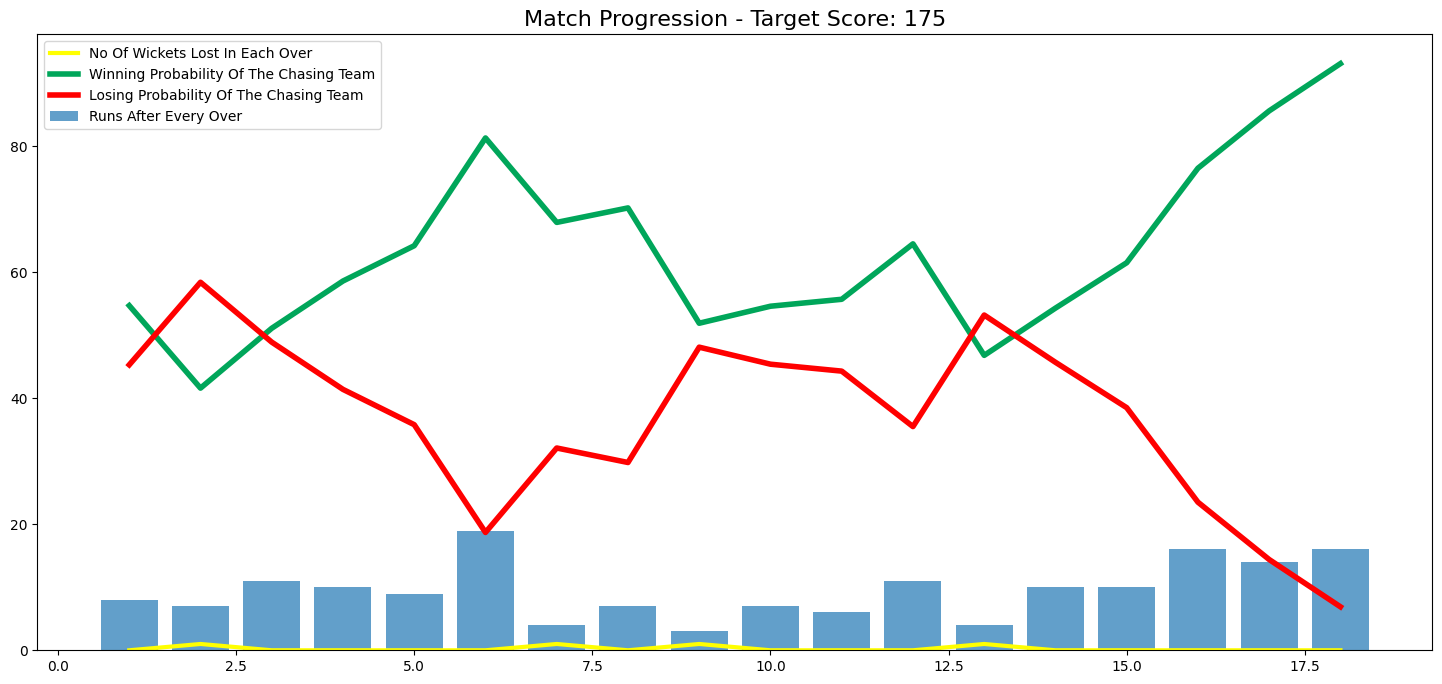

In [42]:
import matplotlib.pyplot as plt

# ----------------------------------------------------------
# 📊 Plot match progression for a given match ID
# ----------------------------------------------------------

# Set the overall figure size for better visibility
plt.figure(figsize=(18, 8))

# 📉 Line plot: Wickets lost in each over
plt.plot(
    temp_df['End Of Over'], 
    temp_df['Wickets Lost In This Over'], 
    color='yellow', linewidth=3, 
    label='No Of Wickets Lost In Each Over'
)

# 📈 Line plot: Win probability of the chasing team
plt.plot(
    temp_df['End Of Over'], 
    temp_df['Win'], 
    color='#00a65a', linewidth=4, 
    label='Winning Probability Of The Chasing Team'
)

# 📉 Line plot: Lose probability of the chasing team
plt.plot(
    temp_df['End Of Over'], 
    temp_df['Lose'], 
    color='red', linewidth=4, 
    label='Losing Probability Of The Chasing Team'
)

# 📊 Bar plot: Runs scored in each over
plt.bar(
    temp_df['End Of Over'], 
    temp_df['Runs After Every Over'], 
    label='Runs After Every Over',
    alpha=0.7  # Slight transparency for better overlay visibility
)

# 🏁 Add a title displaying the target score
plt.title('Match Progression - Target Score: ' + str(target), fontsize=16)

# 🧭 Add legend to identify curves
plt.legend()

# ✅ Show the complete plot
plt.show()

## App Development 
Now we have to build our app.

In [43]:
# List of all the teams
teams

['Chennai Super Kings',
 'Delhi Capitals',
 'Kings XI Punjab',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [44]:
# List of all the cities
deliveries_df['City'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [45]:
# Lastly we save our model in a pickle file which will be used later
import pickle as pkl
pkl.dump(pipe, open('Final_Pipeline.pkl', 'wb'))